## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('students-data.csv', delimiter=';')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.shape

(395, 33)

In [5]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [7]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
(df[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic']] == 0).sum()

school        0
sex           0
address       0
famsize       0
Pstatus       0
Mjob          0
Fjob          0
reason        0
guardian      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
dtype: int64

As per above shown results, we concluded that there are no missing valus and 'zeros' in the categorical columns.

In [9]:
df_int = df.select_dtypes(include ='int64').columns

In [10]:
df_int

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [11]:
(df.select_dtypes(include ='int64') == 0).sum()

age             0
Medu            3
Fedu            2
traveltime      0
studytime       0
failures      312
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences      115
G1              0
G2             13
G3             38
dtype: int64

As per above shown results, we concluded that there are no missing valus in the numerical columns and we have noticed some 'zero' values in the columns. These 'zeros' are acceptable as a data as per defenation of the it's column variable.

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [12]:
df.select_dtypes(include ='object').columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [13]:
df.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [14]:
dfvar = 1.0
varcol = df.var()[df.var() < dfvar].index.values

In [15]:
varcol

array(['traveltime', 'studytime', 'failures', 'famrel', 'freetime',
       'Dalc'], dtype=object)

In [16]:
df2 = df.drop(varcol, axis = 1)

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 no

In [18]:
df.shape

(395, 33)

In [19]:
df2.shape

(395, 27)

As per low variance, we ahve dropped 6 features from source data set. so we have remaining variable with moderate variance to proceed further.

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [20]:
df2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


In [21]:
categorical_feature_mask = df2.dtypes==object
categorical_cols = df2.columns[categorical_feature_mask].tolist()

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2[categorical_cols] = df2[categorical_cols].apply(lambda col: le.fit_transform(col))

In [23]:
df2[categorical_cols].head(10)

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0
5,0,1,1,1,1,3,2,3,1,0,1,1,1,1,1,1,0
6,0,1,1,1,1,2,2,1,1,0,0,0,0,1,1,1,0
7,0,0,1,0,0,2,4,1,1,1,1,0,0,1,1,0,0
8,0,1,1,1,0,3,2,1,1,0,1,1,0,1,1,1,0
9,0,1,1,0,1,2,2,1,1,0,1,1,1,1,1,1,0


In [24]:
df2.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,15,15,15
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,12,12,11
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,6,5,6
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,16,18,19
9,0,1,15,1,0,1,3,4,2,2,...,1,1,0,1,1,5,0,14,15,15


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null int32
sex           395 non-null int32
age           395 non-null int64
address       395 non-null int32
famsize       395 non-null int32
Pstatus       395 non-null int32
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int32
Fjob          395 non-null int32
reason        395 non-null int32
guardian      395 non-null int32
schoolsup     395 non-null int32
famsup        395 non-null int32
paid          395 non-null int32
activities    395 non-null int32
nursery       395 non-null int32
higher        395 non-null int32
internet      395 non-null int32
romantic      395 non-null int32
goout         395 non-null int64
Walc          395 non-null int64
health        395 non-null int64
absences      395 non-null int64
G1            395 non-null int64
G2            395 non-null int64
G3            395 non-null int64
dtyp

Now we have converted all categorical variable to numverical value using label encoding method.

## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [26]:
df2[['G1', 'G2', 'G3']].head()

,G1,G2,G3
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10


In [27]:
from pandas import DataFrame
DataFrame(df2,columns=['G1'])
df2['G1'] = df['G1'].apply(lambda x: 'Pass' if x >= 10 else 'Fail')
DataFrame(df2,columns=['G2'])
df2['G2'] = df['G2'].apply(lambda x: 'Pass' if x >= 10 else 'Fail')
DataFrame(df2,columns=['G3'])
df2['G3'] = df['G3'].apply(lambda x: 'Pass' if x >= 10 else 'Fail')

In [28]:
df2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,Fail,Fail,Fail
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,Fail,Fail,Fail
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,Fail,Fail,Pass
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,Pass,Pass,Pass
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,Fail,Pass,Pass


In [29]:
categorical_feature_mask = df2.dtypes==object
categorical_cols = df2.columns[categorical_feature_mask].tolist()

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2[categorical_cols] = df2[categorical_cols].apply(lambda col: le.fit_transform(col))

In [31]:
df2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


In [49]:
df2[['G1', 'G2', 'G3']].head()

,G1,G2,G3
0,0,0,0
1,0,0,0
2,0,0,1
3,1,1,1
4,0,1,1


As shown above we ahve converted numerical values of G1, G2 and G3 encoded as '1' as Pass and '0' as Fail.

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

In [33]:
import seaborn as sns
%matplotlib inline

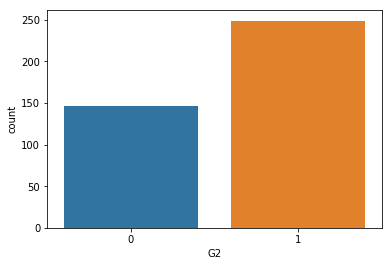

In [41]:
sns.countplot(x='G2',data=df2)

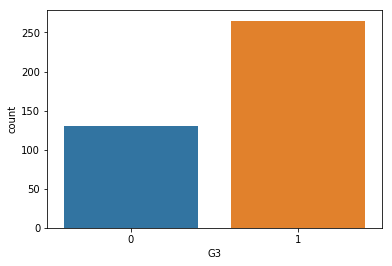

In [42]:
sns.countplot(x='G3',data=df2)

In [52]:
df5 = df[['G1', 'G2', 'G3']].head()

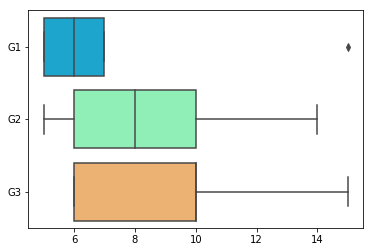

In [53]:
sns.boxplot(data=df5,palette='rainbow',orient='h')

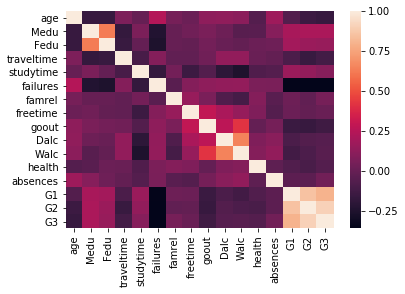

In [54]:
corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
As per the above plots, The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.

## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

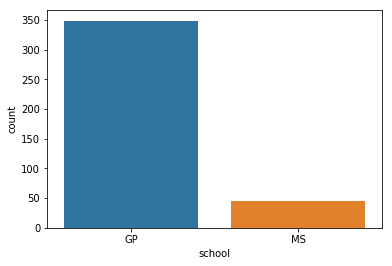

In [56]:
sns.countplot(x='school',data=df)

As per above plot, we noticed that school GP has more number of students than school MS in the supplied data.

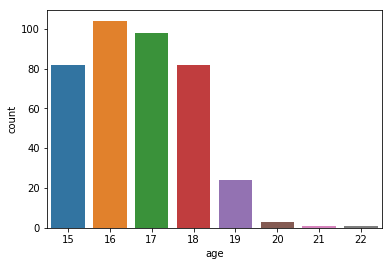

In [57]:
sns.countplot(x='age',data=df)

As per the above plot, we noticed that most of the students age group between 15 and 18.

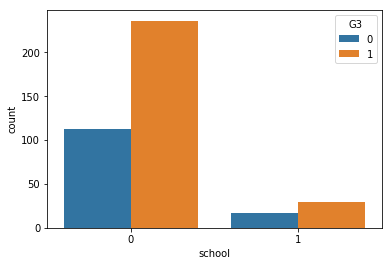

In [62]:
sns.countplot(x='school',data=df2,hue='G3')

As per the above plot more students pass than fail.

## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [65]:
X = df2.drop(labels= "G3" , axis = 1)
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,0,4,...,1,1,0,0,4,1,3,6,0,0
1,0,0,17,1,0,1,1,1,0,2,...,0,1,1,0,3,1,3,4,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,1,0,2,3,3,10,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,1,2,1,5,2,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,1,0,0,2,2,5,4,0,1


In [66]:
y = df2[["G3"]]
y.head()

,G3
0,0
1,0
2,1
3,1
4,1


## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [67]:
from sklearn.model_selection import train_test_split
test_size = 0.24 
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [71]:
X_train.shape

(300, 26)

In [72]:
X_test.shape

(95, 26)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc

In [75]:
model = LogisticRegression()

In [76]:
model.fit(X_train, y_train)

C:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [77]:
y_predict = model.predict(X_test)

In [78]:
model_score = model.score(X_test, y_test)
model_score

0.9578947368421052

In [79]:
metrics.confusion_matrix(y_predict, y_test)

array([[23,  2],
       [ 2, 68]], dtype=int64)

# Naive bayes with Iris data

### Import Iris.csv

In [80]:
d1 = pd.read_csv('Iris.csv')

In [81]:
d1.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [82]:
d1.tail()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [87]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal Length (in cm)    150 non-null float64
Sepal Width in (cm)     150 non-null float64
Petal length (in cm)    150 non-null float64
Petal width (in cm)     150 non-null float64
Class                   150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [89]:
d1.isnull().sum()

Sepal Length (in cm)    0
Sepal Width in (cm)     0
Petal length (in cm)    0
Petal width (in cm)     0
Class                   0
dtype: int64

In [90]:
(d1 == 0).sum()

Sepal Length (in cm)    0
Sepal Width in (cm)     0
Petal length (in cm)    0
Petal width (in cm)     0
Class                   0
dtype: int64

As per above results, we concluded ther is no null and 'zero' values in the data set

## Label Encoding for categorical variable

In [100]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
d1["Class"] = lb_make.fit_transform(d1["Class"])

In [105]:
d1.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [106]:
d1.groupby(["Class"]).count()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Class,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


We have noticed that under each clasification we have 50 data, so the classification of the species equally distributed. That means the provided data is a balenced data.

### Find the distribution of target variable (Class)

### Plot the distribution of target variable using histogram

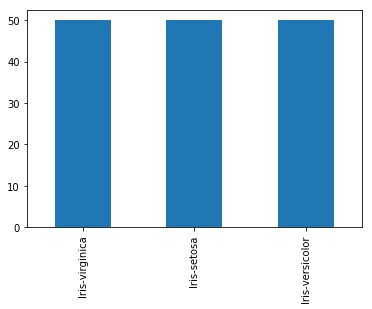

In [83]:
pd.value_counts(d1["Class"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


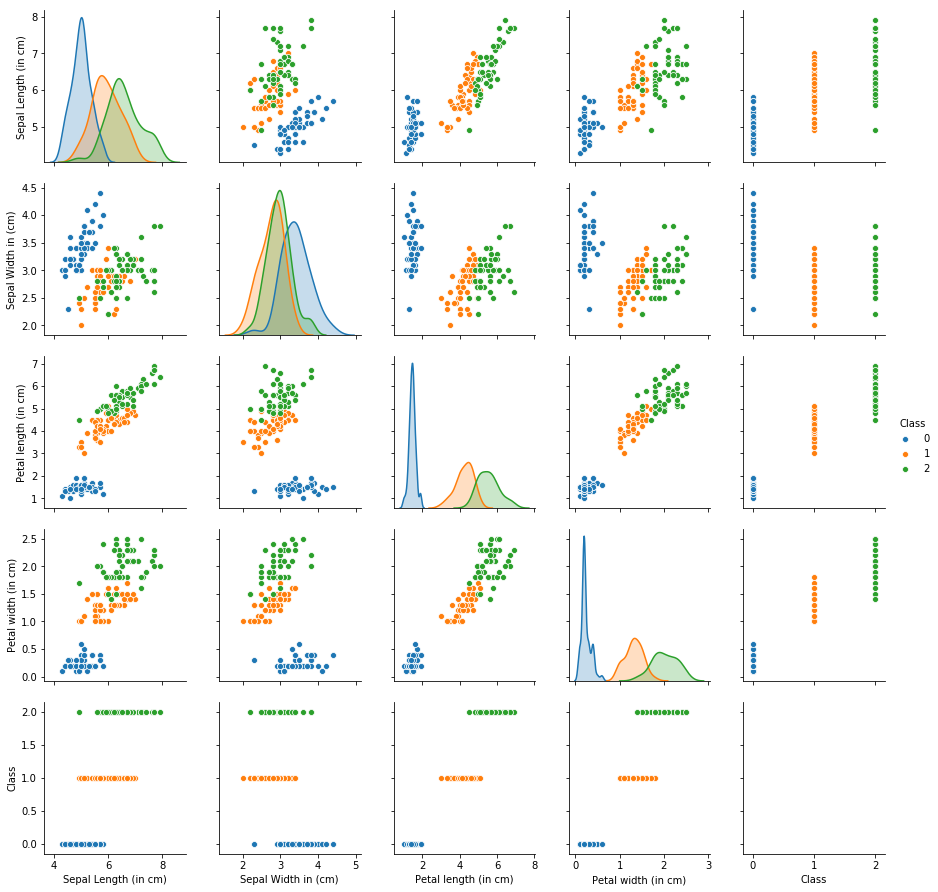

In [139]:
sns.pairplot(d1, hue="Class")

From the above scatter plot, we can find good corelation between petal length and petal width to classify the classes of the species than other variable.

### Correlation among all variables and give your insights

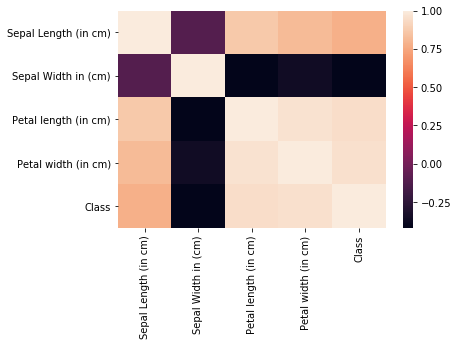

In [108]:
corr = d1.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

### Summary Statistics and explain insights for at least 2 variables

From the above heat map, we can clearly identify the good corelation between class and petal dimensions. And also we can find the poor coretaiom between class and sepal dimensions.

### Split data in Training and Validation in 80:20

In [109]:
X = d1.drop("Class", axis=1)
y = d1["Class"]

In [110]:
from scipy.stats import zscore
X = X.apply(zscore)
X.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [111]:
test_size = 0.20 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [127]:
X_train.shape

(120, 4)

In [128]:
X_test.shape

(30, 4)

### Train and Fit NaiveBayes Model

In [113]:
from sklearn.naive_bayes import GaussianNB

In [114]:
model = GaussianNB()

In [118]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [121]:
y_predict = model.predict(X_test)

In [122]:
model_score = model.score(X_test, y_test)
model_score

0.8333333333333334

In [123]:
metrics.confusion_matrix(y_predict, y_test)

array([[7, 0, 0],
       [0, 9, 2],
       [0, 3, 9]], dtype=int64)

### Do Feature Scaling

# As per the inferences has taken from par plot and heat map, we can drop the poor corelation dimensions such as Sepal Width from train data and we proceed further to improve our accuracy of test prediction.

In [143]:
X = d1.drop(['Class', 'Sepal Width in (cm)'], axis=1)
y = d1["Class"]

In [144]:
from scipy.stats import zscore
X = X.apply(zscore)
X.head()

,Sepal Length (in cm),Petal length (in cm),Petal width (in cm)
0,-0.900681,-1.341272,-1.312977
1,-1.143017,-1.341272,-1.312977
2,-1.385353,-1.398138,-1.312977
3,-1.506521,-1.284407,-1.312977
4,-1.021849,-1.341272,-1.312977


In [145]:
test_size = 0.20 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [146]:
X_train.shape

(120, 3)

In [147]:
X_test.shape

(30, 3)

### Train and Fit NaiveBayes Model

In [148]:
from sklearn.naive_bayes import GaussianNB

In [149]:
model = GaussianNB()

In [150]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [152]:
y_predict = model.predict(X_test)

In [153]:
model_score = model.score(X_test, y_test)
model_score

0.8666666666666667

In [154]:
metrics.confusion_matrix(y_predict, y_test)

array([[ 7,  0,  0],
       [ 0, 10,  2],
       [ 0,  2,  9]], dtype=int64)

# Now the mode accuracy increased from 83% to 86%.